导入库

In [1]:
#导入pandas 和 numpy 用这两个库进行数据处理
import pandas as pd  
import numpy as np  

#用sns画图，看看最开始的数据长什么样
import matplotlib as mpl
import seaborn as sns  # Statistical data visualization

#决策树
from sklearn.tree import DecisionTreeClassifier
#k-nn（k-近邻）
from sklearn.neighbors import KNeighborsClassifier
##高斯朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
#支持向量机
from sklearn.svm import SVC
#集成学习
from sklearn.ensemble import BaggingClassifier
# 保存模型
import joblib

#各种评价标准
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#用来画图比较
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# 1.读入数据集

In [79]:
train_df = pd.read_csv(r'D:\social-media-usage-and-emotional-well-being\pythonProject\data\train.csv', on_bad_lines='skip')
test_df = pd.read_csv(r'D:\social-media-usage-and-emotional-well-being\pythonProject\data\test.csv', on_bad_lines='skip')

下面看DataFrames 的基本结构，以了解我们正在处理的数据。我们将查看数据类型、摘要统计信息，并检查是否有任何缺失值。

In [63]:
print("train_df的内容")
train_df.info()

train_df的内容
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


这里我们看到在Age(年龄)列本应该是int型的Dtype，这里却是object型，所以这一列中有可能混杂了其他类型的数据，我们在接下来的数据预处理时应注意删除

In [64]:
# Display the structure of the training data
print("Information about the training data:")
test_df.info()

Information about the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    object
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(4)
memory usage: 8.2+ KB


在test_df中同样出现了这种情况

每个特征代表的含义

User_ID：用户的唯一标识符。

Age：用户的年龄。

Gender：用户的性别（女性、男性、非二进制）。

Platform：使用的社交媒体平台（例如，Instagram、Twitter、Facebook、LinkedIn、Snapchat、Whatsapp、Telegram）。

Daily_Usage_Time（分钟）：每天在平台上花费的时间（以分钟为单位）。

Posts_Per_Day：每天发布的帖子数。

Likes_Received_Per_Day：每天收到的点赞数。

Comments_Received_Per_Day：每天收到的评论数。

Messages_Sent_Per_Day：每天发送的消息数。

Dominant_Emotion：用户白天的主要情绪状态（例如，快乐、悲伤、愤怒、焦虑、无聊、中性）。


In [65]:

print("\nSummary statistics of the training data:")
train_df.describe()


Summary statistics of the training data:


,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


看看数据分布，数据是什么样的，这样可以确定可以用什么模型

 (1.年龄分布¶

D:\social-media-usage-and-emotional-well-being\pythonProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 351 (\N{LATIN SMALL LETTER S WITH CEDILLA}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
D:\social-media-usage-and-emotional-well-being\pythonProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 305 (\N{LATIN SMALL LETTER DOTLESS I}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


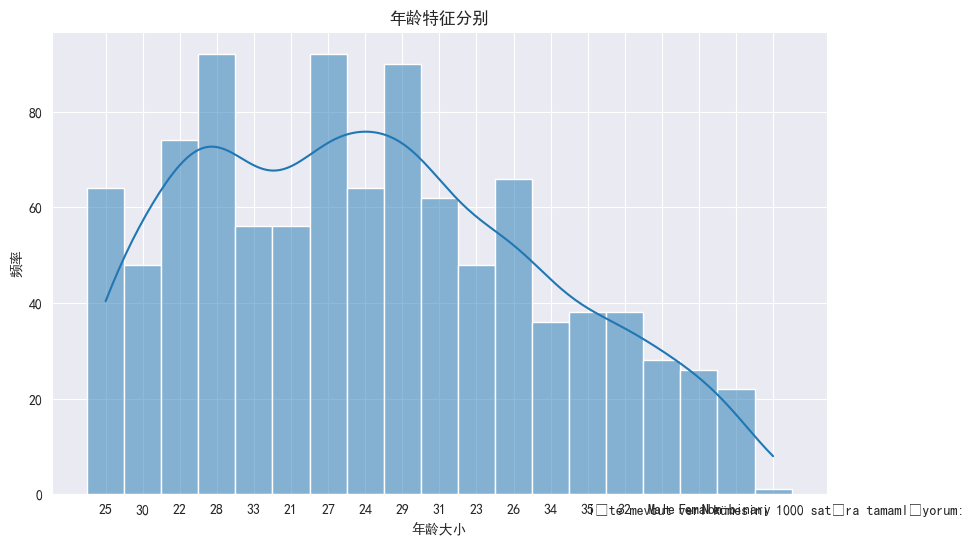

In [66]:
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('年龄特征分别')
plt.xlabel('年龄大小')
plt.ylabel('频率')
plt.show()

(2.性别分布

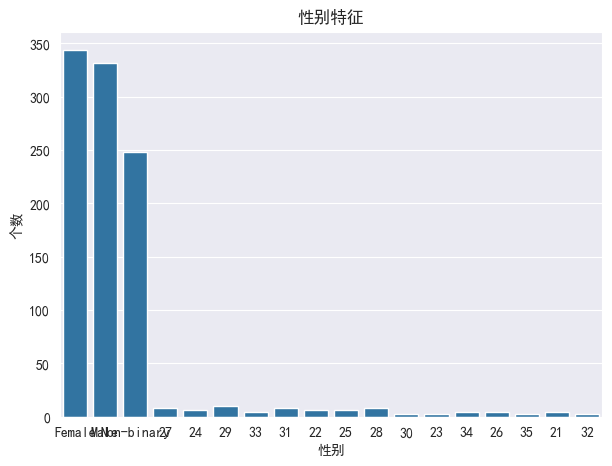

In [67]:

plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=train_df)
plt.title('性别特征')
plt.xlabel('性别')
plt.ylabel('个数')
plt.show()

(3.各平台的每日使用时间¶

D:\social-media-usage-and-emotional-well-being\pythonProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 182 (\N{PILCROW SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


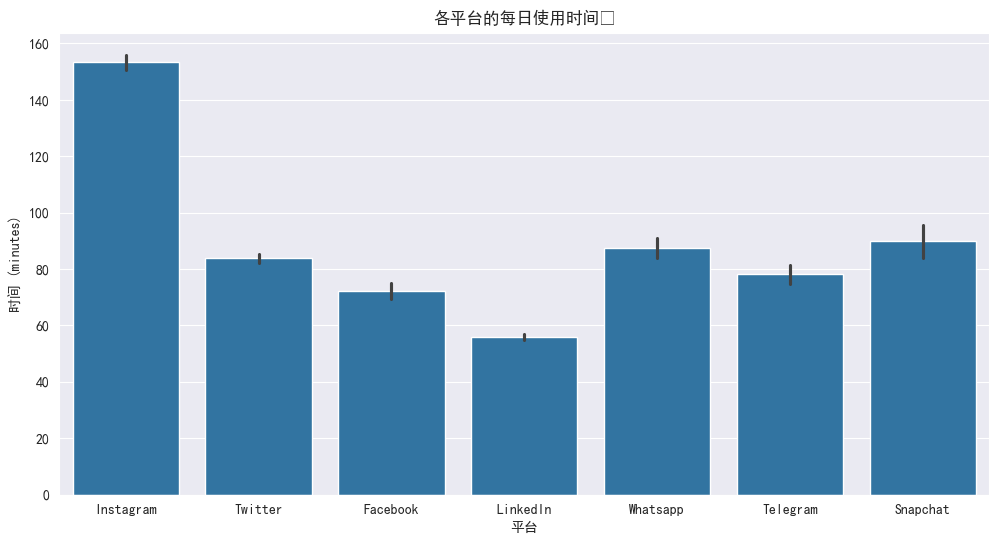

In [68]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train_df, estimator=np.mean)
plt.title('各平台的每日使用时间¶')
plt.xlabel('平台')
plt.ylabel('时间 (minutes)')
plt.show()

(4.情绪分布¶

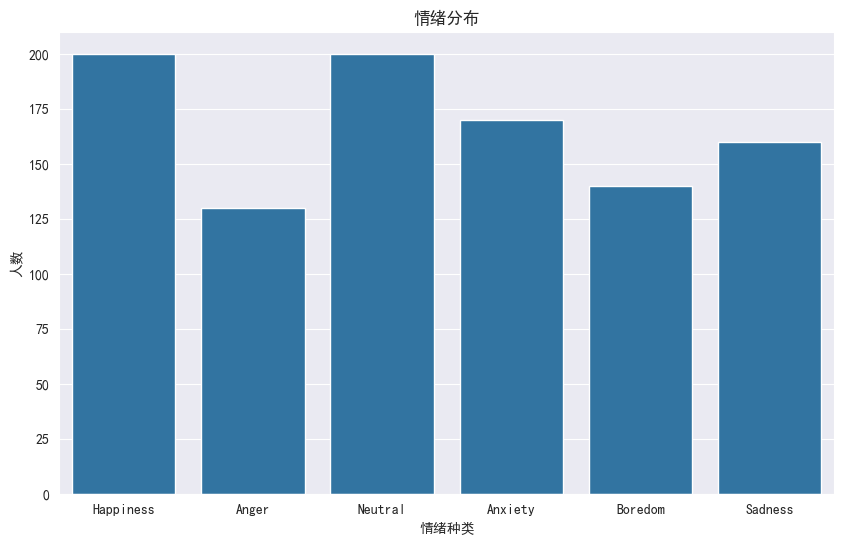

In [69]:
# Plot dominant emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=train_df)
plt.title('情绪分布')
plt.xlabel('情绪种类')
plt.ylabel('人数')
plt.show()

知道了数据是什么样我们下面就可以进行数据预处理

# 2.数据预处理

In [74]:
#去掉空行
train_df = train_df.dropna()
test_df = test_df.dropna()
# 确定一下还有没有空行
print("\nMissing values in training data after dropping rows with missing values:")
print(train_df.isnull().sum())
train_df


Missing values in training data after dropping rows with missing values:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


这时我们已经没有缺失值了

但是我们应该还删去不正确的行

下面我们就可以进行数据集划分


In [83]:
def is_numeric(value):
    try:
        float(value)
        return True
    except:
        return False
train_df = train_df[train_df["Age"].map(is_numeric)]
test_df = test_df[test_df["Age"].map(is_numeric)]

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     924 non-null    object 
 1   Age                         924 non-null    object 
 2   Gender                      924 non-null    object 
 3   Platform                    924 non-null    object 
 4   Daily_Usage_Time (minutes)  924 non-null    float64
 5   Posts_Per_Day               924 non-null    float64
 6   Likes_Received_Per_Day      924 non-null    float64
 7   Comments_Received_Per_Day   924 non-null    float64
 8   Messages_Sent_Per_Day       924 non-null    float64
 9   Dominant_Emotion            924 non-null    object 
dtypes: float64(5), object(5)
memory usage: 79.4+ KB


In [84]:
train_df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


In [85]:
#解决错误1
# One-hot encode the categorical variables for train, test, and validation sets
train_df = pd.get_dummies(train_df, columns=['Gender', 'Platform'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender', 'Platform'], drop_first=True)

# 保证test和train里的每一列都相等
missing_cols_test = set(train_df.columns) - set(test_df.columns)
for col in missing_cols_test:
    test_df[col] = 0
test_df = test_df[train_df.columns]

# 确定train 和 test是否一致
print("Columns in training data:", train_df.columns)
print("\nColumns in test data after encoding and alignment:", test_df.columns)


Columns in training data: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Male',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp'],
      dtype='object')

Columns in test data after encoding and alignment: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Male',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp'],
      dtype='object')


一开始把user_id也加入到train_x里了，导致knn的模型的效果非常差

In [86]:
train_y = train_df['Dominant_Emotion']
train_x = train_df.drop('Dominant_Emotion',axis=1)
train_x = train_x.drop('User_ID',axis=1)
test_y = test_df['Dominant_Emotion']
test_x = test_df.drop('Dominant_Emotion',axis=1)
test_x = test_x.drop('User_ID',axis=1)

In [87]:
test_x.to_csv(r'D:\social-media-usage-and-emotional-well-being\pythonProject\Data preprocessing\test_x.csv', index=False)
test_y.to_csv(r'D:\social-media-usage-and-emotional-well-being\pythonProject\Data preprocessing\test_y.csv', index=False)
train_x.to_csv(r'D:\social-media-usage-and-emotional-well-being\pythonProject\Data preprocessing\train_x.csv', index=False)
train_y.to_csv(r'D:\social-media-usage-and-emotional-well-being\pythonProject\Data preprocessing\train_y.csv', index=False)
test_x

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,27,120,4,40,18,22,False,False,False,False,True,False,False,False
1,21,60,1,18,7,12,False,True,False,False,True,False,False,False
2,28,115,3,38,18,27,False,True,False,False,True,False,False,False
3,27,105,3,48,20,28,True,False,False,False,False,True,False,False
4,21,55,3,17,7,12,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,22,70,1,20,5,22,True,False,False,False,False,False,True,False
99,33,85,4,35,18,18,True,False,False,True,False,False,False,False
100,24,110,6,35,23,25,False,True,False,False,False,False,False,False
101,24,75,3,37,16,22,True,False,False,False,False,True,False,False


In [88]:

train_x

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,25,120.0,3.0,45.0,10.0,12.0,False,False,True,False,False,False,False,False
1,30,90.0,5.0,20.0,25.0,30.0,True,False,False,False,False,False,True,False
2,22,60.0,2.0,15.0,5.0,20.0,False,True,False,False,False,False,False,False
3,28,200.0,8.0,100.0,30.0,50.0,False,False,True,False,False,False,False,False
4,33,45.0,1.0,5.0,2.0,10.0,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,33,85.0,4.0,35.0,18.0,18.0,False,True,False,False,False,False,True,False
997,22,70.0,1.0,14.0,6.0,10.0,False,False,False,False,False,False,False,False
998,35,110.0,3.0,50.0,25.0,25.0,True,False,False,False,False,False,False,True
999,28,60.0,2.0,18.0,8.0,18.0,False,True,False,False,False,True,False,False


In [89]:
test_y

0      Neutral
1      Neutral
2      Anxiety
3      Anxiety
4      Neutral
        ...   
98     Neutral
99     Boredom
100    Sadness
101    Neutral
102    Boredom
Name: Dominant_Emotion, Length: 102, dtype: object

In [90]:
train_y

0       Happiness
1           Anger
2         Neutral
3         Anxiety
4         Boredom
          ...    
996       Boredom
997       Neutral
998     Happiness
999         Anger
1000      Neutral
Name: Dominant_Emotion, Length: 924, dtype: object

处理好，划分好数据集后进行模型构建

# 3.模型构建

# 3.1 决策树

In [91]:
for i in range(1,20):
      Decision_Tree_debug = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=2024)
      Decision_Tree_debug.fit(train_x,train_y)
      Decision_Tree_debug_pred = Decision_Tree_debug.predict(test_x)
      Decision_Tree_debug_accuracy = accuracy_score(test_y, Decision_Tree_debug_pred)
      print(f"max_depth = {i} 时 accuracy = {Decision_Tree_debug_accuracy}")

max_depth = 1 时 accuracy = 0.38235294117647056
max_depth = 2 时 accuracy = 0.4411764705882353
max_depth = 3 时 accuracy = 0.5098039215686274
max_depth = 4 时 accuracy = 0.5784313725490197
max_depth = 5 时 accuracy = 0.6568627450980392
max_depth = 6 时 accuracy = 0.7745098039215687
max_depth = 7 时 accuracy = 0.8529411764705882
max_depth = 8 时 accuracy = 0.8921568627450981
max_depth = 9 时 accuracy = 0.9117647058823529
max_depth = 10 时 accuracy = 0.9411764705882353
max_depth = 11 时 accuracy = 0.9509803921568627
max_depth = 12 时 accuracy = 0.9411764705882353
max_depth = 13 时 accuracy = 0.9411764705882353
max_depth = 14 时 accuracy = 0.9411764705882353
max_depth = 15 时 accuracy = 0.9411764705882353
max_depth = 16 时 accuracy = 0.9411764705882353
max_depth = 17 时 accuracy = 0.9411764705882353
max_depth = 18 时 accuracy = 0.9411764705882353
max_depth = 19 时 accuracy = 0.9411764705882353


我们可以看出max_depth >= 10 时accuracy最大，为避免计算负担，我们选取max_depth = 10

In [92]:
Decision_Tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=2024)

In [93]:
Decision_Tree.fit(train_x,train_y)
joblib.dump(Decision_Tree, 'D:\social-media-usage-and-emotional-well-being\pythonProject\models\Decision_Tree_model.pickle')

['D:\\social-media-usage-and-emotional-well-being\\pythonProject\\models\\Decision_Tree_model.pickle']

错误1

在执行Decision_Tree.fit(train_x,train_y)

时报错ValueError: could not convert string to float: 'Male'

原因：fit函数中的x部分不能有str，应该是数字

解决方法：对str列进行编码

In [94]:
Decision_Tree_pred = Decision_Tree.predict(test_x)
Decision_Tree_pred

array(['Neutral', 'Neutral', 'Anxiety', 'Anxiety', 'Neutral', 'Happiness',
       'Happiness', 'Neutral', 'Happiness', 'Boredom', 'Happiness',
       'Neutral', 'Happiness', 'Happiness', 'Boredom', 'Anxiety',
       'Sadness', 'Boredom', 'Happiness', 'Anger', 'Neutral', 'Anger',
       'Neutral', 'Neutral', 'Boredom', 'Anxiety', 'Boredom', 'Neutral',
       'Sadness', 'Sadness', 'Sadness', 'Boredom', 'Sadness', 'Happiness',
       'Anxiety', 'Happiness', 'Anger', 'Anxiety', 'Sadness', 'Boredom',
       'Anxiety', 'Sadness', 'Anger', 'Neutral', 'Anxiety', 'Sadness',
       'Boredom', 'Happiness', 'Neutral', 'Anger', 'Anxiety', 'Anger',
       'Neutral', 'Happiness', 'Anxiety', 'Neutral', 'Anxiety', 'Anger',
       'Neutral', 'Anger', 'Anxiety', 'Boredom', 'Boredom', 'Neutral',
       'Anxiety', 'Anxiety', 'Neutral', 'Anxiety', 'Neutral', 'Happiness',
       'Boredom', 'Boredom', 'Neutral', 'Sadness', 'Neutral', 'Neutral',
       'Happiness', 'Anxiety', 'Neutral', 'Anxiety', 'Sadness', '

一开始accuracy只有0.5多，于是开始微调

In [95]:
Decision_Tree_accuracy = accuracy_score(test_y, Decision_Tree_pred)
Decision_Tree_accuracy

0.9411764705882353

1.max_depth = 3        accuracy = 0.5339805825242718

2.max_depth = 7        accuracy = 0.8737864077669902

3.max_depth = 10       accuracy = 0.9611650485436893

4.max_depth = 13       accuracy = 0.941747572815534

5.max_depth = 11       accuracy = 0.942343256687632

6.max_depth = 9        accuracy = 0.9223300970873787

得当max_depth = 10 时模型效果最好

In [96]:
Decision_Tree_precision = precision_score(test_y, Decision_Tree_pred, average='macro')
Decision_Tree_recall = recall_score(test_y,       Decision_Tree_pred, average='micro')
Decision_Tree_f1 = f1_score(test_y,               Decision_Tree_pred, average='weighted')
Decision_Tree_accuracy = accuracy_score(test_y,   Decision_Tree_pred)
print("\nDecision_Tree_accuracy   ",Decision_Tree_accuracy,
      "\nDecision_Tree_precision  ",Decision_Tree_precision,
      "\nDecision_Tree_recall     ",Decision_Tree_recall,
      "\nDecision_Tree_f1         ",Decision_Tree_f1)


Decision_Tree_accuracy    0.9411764705882353 
Decision_Tree_precision   0.9234126984126986 
Decision_Tree_recall      0.9411764705882353 
Decision_Tree_f1          0.94242850175804


# 3.2高斯贝叶斯

In [100]:
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB()
GaussianNB.fit(train_x,train_y)
joblib.dump(GaussianNB, 'D:\social-media-usage-and-emotional-well-being\pythonProject\models\GaussianNB_model.pickle')

['D:\\social-media-usage-and-emotional-well-being\\pythonProject\\models\\GaussianNB_model.pickle']

In [101]:
GaussianNB_pred = GaussianNB.predict(test_x)
GaussianNB_pred

array(['Sadness', 'Sadness', 'Sadness', 'Anger', 'Boredom', 'Happiness',
       'Happiness', 'Boredom', 'Sadness', 'Boredom', 'Happiness',
       'Boredom', 'Happiness', 'Happiness', 'Boredom', 'Boredom',
       'Boredom', 'Boredom', 'Happiness', 'Anger', 'Boredom', 'Anger',
       'Boredom', 'Anger', 'Boredom', 'Boredom', 'Boredom', 'Sadness',
       'Sadness', 'Boredom', 'Anger', 'Boredom', 'Anger', 'Happiness',
       'Sadness', 'Happiness', 'Boredom', 'Boredom', 'Boredom', 'Boredom',
       'Boredom', 'Boredom', 'Anger', 'Boredom', 'Boredom', 'Sadness',
       'Boredom', 'Happiness', 'Boredom', 'Happiness', 'Sadness', 'Anger',
       'Anger', 'Anger', 'Anger', 'Sadness', 'Anger', 'Anger', 'Anger',
       'Anger', 'Boredom', 'Boredom', 'Boredom', 'Boredom', 'Anger',
       'Anger', 'Boredom', 'Boredom', 'Boredom', 'Happiness', 'Boredom',
       'Boredom', 'Boredom', 'Boredom', 'Boredom', 'Boredom', 'Happiness',
       'Boredom', 'Happiness', 'Boredom', 'Sadness', 'Boredom', 'Sadness

In [102]:
GaussianNB_precision = precision_score(test_y, GaussianNB_pred, average='macro')
GaussianNB_recall = recall_score(test_y,       GaussianNB_pred, average='micro')
GaussianNB_f1 = f1_score(test_y,               GaussianNB_pred, average='weighted')
GaussianNB_accuracy = accuracy_score(test_y,   GaussianNB_pred)
print("\nGaussianNB_accuracy   ",GaussianNB_accuracy,
      "\nGaussianNB_precision  ",GaussianNB_precision,
      "\nGaussianNB_recall     ",GaussianNB_recall,
      "\nGaussianNB_f1         ",GaussianNB_f1)


GaussianNB_accuracy    0.37254901960784315 
GaussianNB_precision   0.2778166278166278 
GaussianNB_recall      0.37254901960784315 
GaussianNB_f1          0.25447413486443143


D:\social-media-usage-and-emotional-well-being\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


果断放弃贝叶斯

# 3.3 knn

In [103]:
for i in range(3,21):
      knn_debug = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', leaf_size=30)
      knn_debug.fit(train_x,train_y)
      knn_debug_pred = knn_debug.predict(test_x)
      knn_debug_accuracy = accuracy_score(test_y,   knn_debug_pred)
      print(f"当n_neighbors = {i} 时，accuracy = {knn_debug_accuracy}")

当n_neighbors = 3 时，accuracy = 0.9215686274509803
当n_neighbors = 4 时，accuracy = 0.9215686274509803
当n_neighbors = 5 时，accuracy = 0.9215686274509803
当n_neighbors = 6 时，accuracy = 0.9117647058823529
当n_neighbors = 7 时，accuracy = 0.9117647058823529
当n_neighbors = 8 时，accuracy = 0.9117647058823529
当n_neighbors = 9 时，accuracy = 0.9117647058823529
当n_neighbors = 10 时，accuracy = 0.9117647058823529
当n_neighbors = 11 时，accuracy = 0.9117647058823529
当n_neighbors = 12 时，accuracy = 0.9117647058823529
当n_neighbors = 13 时，accuracy = 0.9117647058823529
当n_neighbors = 14 时，accuracy = 0.9117647058823529
当n_neighbors = 15 时，accuracy = 0.9019607843137255
当n_neighbors = 16 时，accuracy = 0.8823529411764706
当n_neighbors = 17 时，accuracy = 0.8235294117647058
当n_neighbors = 18 时，accuracy = 0.7647058823529411
当n_neighbors = 19 时，accuracy = 0.7843137254901961
当n_neighbors = 20 时，accuracy = 0.7450980392156863


可以看到当n_neighbors = 1时 accuracy最高，但是k = 1时易发生过拟合

In [104]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30)
knn.fit(train_x,train_y)
joblib.dump(knn, 'D:\social-media-usage-and-emotional-well-being\pythonProject\models\knn_model.pickle')

['D:\\social-media-usage-and-emotional-well-being\\pythonProject\\models\\knn_model.pickle']

In [105]:
knn_pred = knn.predict(test_x)
knn_pred

array(['Neutral', 'Neutral', 'Anxiety', 'Anxiety', 'Neutral', 'Happiness',
       'Happiness', 'Neutral', 'Happiness', 'Boredom', 'Sadness',
       'Neutral', 'Happiness', 'Happiness', 'Boredom', 'Anxiety',
       'Sadness', 'Boredom', 'Happiness', 'Anger', 'Neutral', 'Anger',
       'Neutral', 'Neutral', 'Boredom', 'Neutral', 'Boredom', 'Neutral',
       'Sadness', 'Sadness', 'Sadness', 'Boredom', 'Sadness', 'Happiness',
       'Anxiety', 'Happiness', 'Anger', 'Anxiety', 'Sadness', 'Boredom',
       'Anxiety', 'Sadness', 'Anger', 'Neutral', 'Anxiety', 'Sadness',
       'Boredom', 'Happiness', 'Neutral', 'Anger', 'Anxiety', 'Anger',
       'Neutral', 'Happiness', 'Anxiety', 'Neutral', 'Anxiety', 'Anger',
       'Neutral', 'Anger', 'Anxiety', 'Boredom', 'Boredom', 'Neutral',
       'Anxiety', 'Anxiety', 'Neutral', 'Anxiety', 'Neutral', 'Happiness',
       'Boredom', 'Boredom', 'Neutral', 'Sadness', 'Neutral', 'Neutral',
       'Happiness', 'Anxiety', 'Neutral', 'Anxiety', 'Anger', 'Neut

In [106]:
knn_precision = precision_score(test_y, knn_pred, average='macro')
knn_recall = recall_score(test_y,       knn_pred, average='micro')
knn_f1 = f1_score(test_y,               knn_pred, average='weighted')
knn_accuracy = accuracy_score(test_y,   knn_pred)
print("\nknn_accuracy   ",knn_accuracy,
      "\nknn_precision  ",knn_precision,
      "\nknn_recall     ",knn_recall,
      "\nknn_f1         ",knn_f1)


knn_accuracy    0.9215686274509803 
knn_precision   0.9085409189575855 
knn_recall      0.9215686274509803 
knn_f1          0.9219396426646769


# 3.4支持向量机（SVM）

In [107]:
svm_debug_list = []#
for i in range(1,3000,100):
      svm_debug = SVC(C=i, kernel='rbf', gamma='scale', probability=False)
      svm_debug.fit(train_x,train_y)
      svm_debug_pred = svm_debug.predict(test_x)
      svm_debug_accuracy = accuracy_score(test_y,svm_debug_pred)
      svm_debug_list.append([i,svm_debug_accuracy])
      print(f"当 C = {i} 时，accuracy = {svm_debug_accuracy}")

当 C = 1 时，accuracy = 0.4803921568627451
当 C = 101 时，accuracy = 0.6764705882352942
当 C = 201 时，accuracy = 0.6862745098039216
当 C = 301 时，accuracy = 0.7647058823529411
当 C = 401 时，accuracy = 0.7843137254901961
当 C = 501 时，accuracy = 0.7745098039215687
当 C = 601 时，accuracy = 0.7745098039215687
当 C = 701 时，accuracy = 0.7941176470588235
当 C = 801 时，accuracy = 0.7941176470588235
当 C = 901 时，accuracy = 0.8235294117647058
当 C = 1001 时，accuracy = 0.8333333333333334
当 C = 1101 时，accuracy = 0.8431372549019608
当 C = 1201 时，accuracy = 0.8529411764705882
当 C = 1301 时，accuracy = 0.8529411764705882
当 C = 1401 时，accuracy = 0.8529411764705882
当 C = 1501 时，accuracy = 0.8529411764705882
当 C = 1601 时，accuracy = 0.8725490196078431
当 C = 1701 时，accuracy = 0.8627450980392157
当 C = 1801 时，accuracy = 0.8627450980392157
当 C = 1901 时，accuracy = 0.8627450980392157
当 C = 2001 时，accuracy = 0.8725490196078431
当 C = 2101 时，accuracy = 0.8725490196078431
当 C = 2201 时，accuracy = 0.8823529411764706
当 C = 2301 时，accuracy =

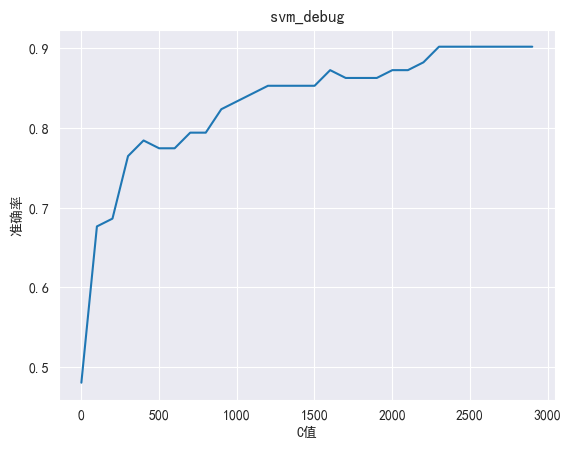

In [108]:
x = [svm_debug_list[i][0] for i in range(len(svm_debug_list))]
y = [svm_debug_list[i][1] for i in range(len(svm_debug_list))]
plt.plot(x, y)
plt.xlabel('C值')
plt.ylabel('准确率')
plt.title('svm_debug')
plt.show()

In [109]:
svm = SVC(C=48000, kernel='rbf', gamma='scale', probability=False)
svm.fit(train_x,train_y)
joblib.dump(svm, 'D:\social-media-usage-and-emotional-well-being\pythonProject\models\svm_model.pickle')
svm_pred = svm.predict(test_x)
svm_pred

array(['Neutral', 'Neutral', 'Anxiety', 'Anxiety', 'Neutral', 'Happiness',
       'Happiness', 'Neutral', 'Happiness', 'Boredom', 'Happiness',
       'Neutral', 'Happiness', 'Happiness', 'Boredom', 'Anxiety',
       'Sadness', 'Boredom', 'Happiness', 'Anger', 'Neutral', 'Anger',
       'Neutral', 'Neutral', 'Boredom', 'Anxiety', 'Boredom', 'Neutral',
       'Sadness', 'Sadness', 'Sadness', 'Boredom', 'Sadness', 'Happiness',
       'Anxiety', 'Happiness', 'Anger', 'Anxiety', 'Sadness', 'Boredom',
       'Anxiety', 'Sadness', 'Anger', 'Neutral', 'Anxiety', 'Sadness',
       'Boredom', 'Happiness', 'Neutral', 'Anger', 'Anxiety', 'Anger',
       'Neutral', 'Happiness', 'Anxiety', 'Neutral', 'Anxiety', 'Anger',
       'Neutral', 'Anger', 'Anxiety', 'Boredom', 'Boredom', 'Neutral',
       'Anxiety', 'Anxiety', 'Neutral', 'Anxiety', 'Neutral', 'Happiness',
       'Boredom', 'Anxiety', 'Neutral', 'Sadness', 'Neutral', 'Neutral',
       'Anxiety', 'Anxiety', 'Neutral', 'Anxiety', 'Sadness', 'Ne

In [110]:
svm_precision = precision_score(test_y, svm_pred, average='macro')
svm_recall = recall_score(test_y,       svm_pred, average='micro')
svm_f1 = f1_score(test_y,               svm_pred, average='weighted')
svm_accuracy = accuracy_score(test_y,   svm_pred)
print("\nknn_accuracy   ",svm_accuracy,
      "\nknn_precision  ",svm_precision,
      "\nknn_recall     ",svm_recall,
      "\nknn_f1         ",svm_f1)


knn_accuracy    0.9411764705882353 
knn_precision   0.9381629240324894 
knn_recall      0.9411764705882353 
knn_f1          0.9411076711386309


# 3.5集成学习

In [35]:
max_depth_min = 1            #max_depth的最小值
max_depth_max = 25           #max_depth的最大值
n_estimators_min = 10        #n_estimators的最小值
n_estimators_max = 500       #n_estimators的最大值
n_estimators_step = 20       #n_estimators的步长
Ensemble_Learning_debug = [] #将调试信息记录到列表中

for i in range(max_depth_min,max_depth_max):
    row = []   #Ensemble_Learning_debug的行
    
    for j in range(n_estimators_min,n_estimators_max,n_estimators_step):
        # 示例化基础分类器，max_depth=i
        base_clf_debug = DecisionTreeClassifier(criterion='gini', max_depth=i)
        # 实例化集成分类器，指定基础分类器是base_clf_debug、集成的数量（n_estimators）为j
        bagging_clf_debug = BaggingClassifier(base_clf_debug,n_estimators=j, random_state=42)
        # 训练集成学习模型
        bagging_clf_debug.fit(train_x, train_y)
        # 训练基础分类器模型
        base_clf_debug.fit(train_x, train_y)
        y_pred_bagging = bagging_clf_debug.predict(test_x)
        #基础分类器的准确度
        bagging_accuracy_debug = accuracy_score(test_y, y_pred_bagging)
        # 使用单个基础分类器模型进行预测
        y_pred_base_debug = base_clf_debug.predict(test_x)
        base_accuracy_debug = accuracy_score(test_y, y_pred_base_debug)
        
        print(f"当max_depth={i},n_estimators={j}单个基础分类器准确率{base_accuracy_debug}",f"集成学习模型的准确率：{bagging_accuracy_debug}")
        row.append(bagging_accuracy_debug)
    #记录调试成绩
    Ensemble_Learning_debug.append(row)
    

当max_depth=1,n_estimators=10单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=30单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=50单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=70单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=90单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=110单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=130单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=150单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=170单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=190单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=210单个基础分类器准确率0.3786407766990291 集成学习模型的准确率：0.3786407766990291
当max_depth=1,n_estimators=230单个基础分类器准

In [111]:
Ensemble_Learning_debug_pd = pd.DataFrame(data=Ensemble_Learning_debug,
                                          columns=["n_estimators="+str(i) for i in range(n_estimators_min,n_estimators_max,n_estimators_step)], 
                                          index = ["max_depth="+str(i) for i in range(max_depth_min,max_depth_max)] )
Ensemble_Learning_debug_pd

,n_estimators=10,n_estimators=30,n_estimators=50,n_estimators=70,n_estimators=90,n_estimators=110,n_estimators=130,n_estimators=150,n_estimators=170,n_estimators=190,...,n_estimators=310,n_estimators=330,n_estimators=350,n_estimators=370,n_estimators=390,n_estimators=410,n_estimators=430,n_estimators=450,n_estimators=470,n_estimators=490
max_depth=1,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,...,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641,0.378641
max_depth=2,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,...,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893,0.436893
max_depth=3,0.514563,0.514563,0.533981,0.533981,0.524272,0.563107,0.563107,0.563107,0.563107,0.563107,...,0.563107,0.563107,0.563107,0.563107,0.563107,0.563107,0.563107,0.563107,0.563107,0.563107
max_depth=4,0.640777,0.660194,0.660194,0.631068,0.631068,0.631068,0.631068,0.631068,0.631068,0.631068,...,0.640777,0.640777,0.640777,0.640777,0.631068,0.631068,0.631068,0.631068,0.631068,0.631068
max_depth=5,0.805825,0.786408,0.796117,0.805825,0.796117,0.834951,0.825243,0.825243,0.825243,0.825243,...,0.796117,0.805825,0.825243,0.825243,0.825243,0.825243,0.825243,0.825243,0.825243,0.825243
max_depth=6,0.834951,0.873786,0.893204,0.893204,0.893204,0.893204,0.893204,0.893204,0.883495,0.902913,...,0.902913,0.902913,0.893204,0.893204,0.902913,0.902913,0.893204,0.893204,0.893204,0.902913
max_depth=7,0.873786,0.932039,0.932039,0.932039,0.932039,0.932039,0.922330,0.922330,0.922330,0.932039,...,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039
max_depth=8,0.922330,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,...,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039
max_depth=9,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,...,0.932039,0.941748,0.941748,0.941748,0.941748,0.941748,0.941748,0.941748,0.941748,0.932039
max_depth=10,0.932039,0.941748,0.941748,0.941748,0.941748,0.941748,0.941748,0.932039,0.941748,0.932039,...,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.932039,0.941748,0.932039,0.932039


In [112]:
base_clf = DecisionTreeClassifier(criterion='gini', max_depth=19)
# 实例化BaggingClassifier，指定基础分类器、集成的数量（n_estimators）等参数
bagging_clf = BaggingClassifier(n_estimators=470, random_state=42)
# 训练集成学习模型
bagging_clf.fit(train_x, train_y)

# 训练单个基础分类器模型
base_clf.fit(train_x, train_y)

joblib.dump(bagging_clf, r'D:\social-media-usage-and-emotional-well-being\pythonProject\models\bagging_clf.pickle')

['D:\\social-media-usage-and-emotional-well-being\\pythonProject\\models\\bagging_clf.pickle']

In [113]:
# 使用集成学习模型进行预测
y_pred_bagging = bagging_clf.predict(test_x)
bagging_accuracy = accuracy_score(test_y, y_pred_bagging)

# 使用单个基础分类器模型进行预测
y_pred_base = base_clf.predict(test_x)
base_accuracy = accuracy_score(test_y, y_pred_base)


print("单个基础分类器（决策树）的准确率：", base_accuracy)
print("集成学习模型（Bagging）的准确率：", bagging_accuracy)

单个基础分类器（决策树）的准确率： 0.9411764705882353
集成学习模型（Bagging）的准确率： 0.9509803921568627
